## Gradient Boosting for Regression
The intuition behind `gradient boosting` algorithm is to leverage the pattern
in residuals and strenghten a weak prediction model, until our residuals
become randomly (maybe random normal too) distributed. Once we reach a
stage that residuals do not have any pattern that can be modeled, we can stop
modeling residuals (as it might lead to overfitting).

In [1]:
from math import pow
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb

In [2]:
# simulate data
X = np.arange(0, 6.6, 0.1)
Y = 10 + X * np.cos(np.pi * X) - 1.5 * X

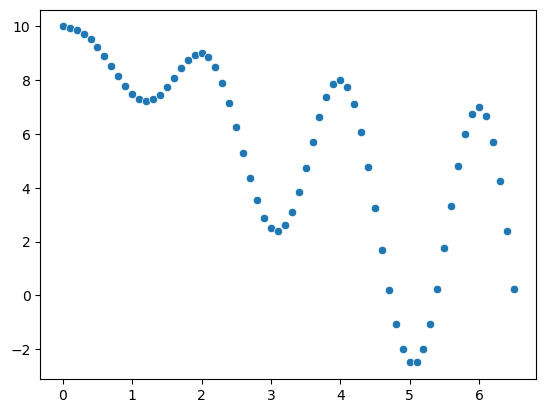

In [3]:
fig = sns.scatterplot(x=X, y=Y)

In [4]:
# initialize variables to use in estimation
X_train = X.reshape(-1, 1)

In [5]:
n_estimators = 10  # number of boosted trees to fit

# initiate vector for combined predictions
combined_preds = np.zeros(len(Y))

# leaning rate
rate = 1

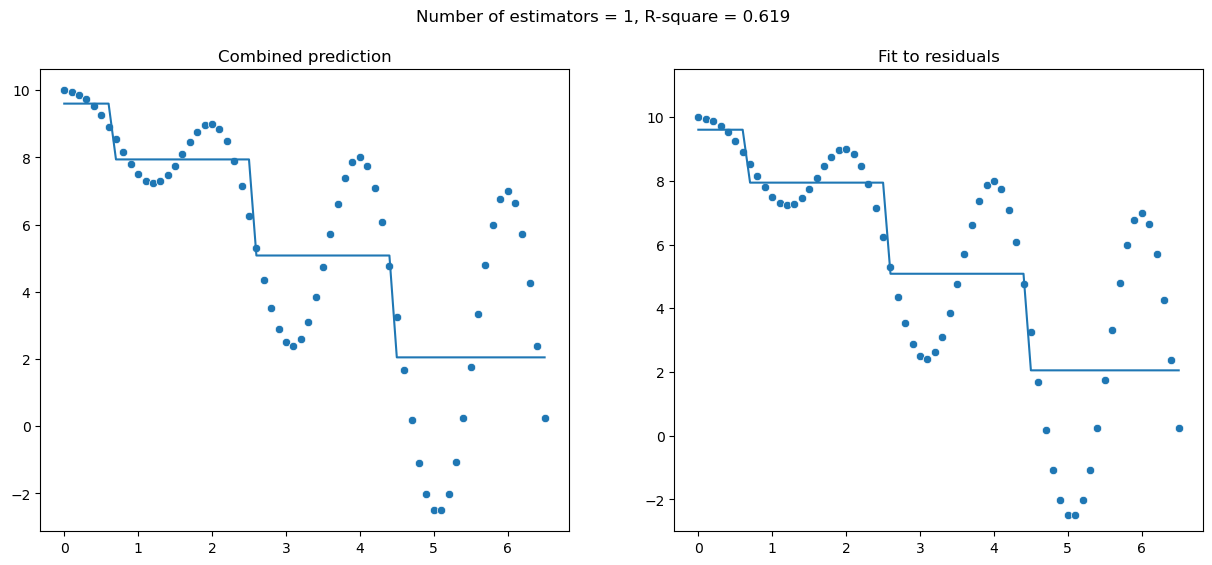

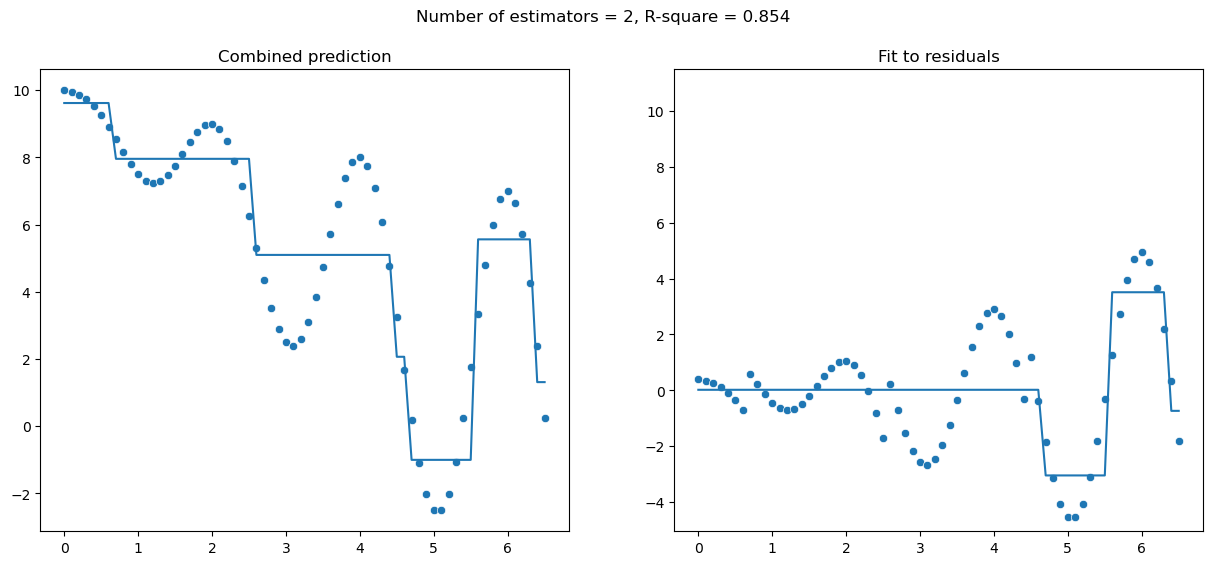

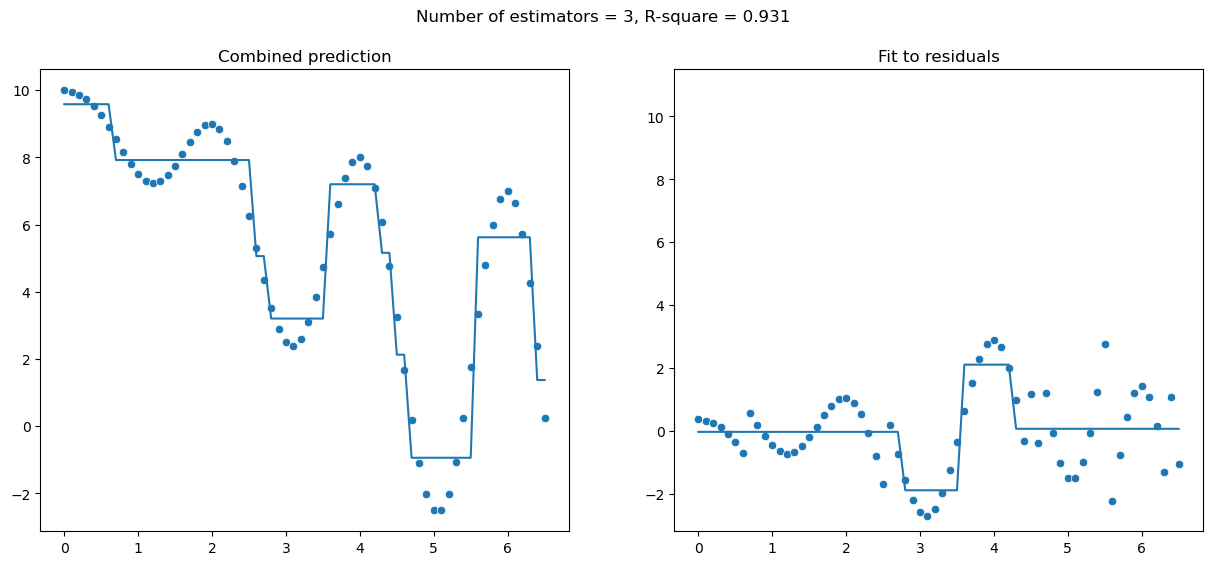

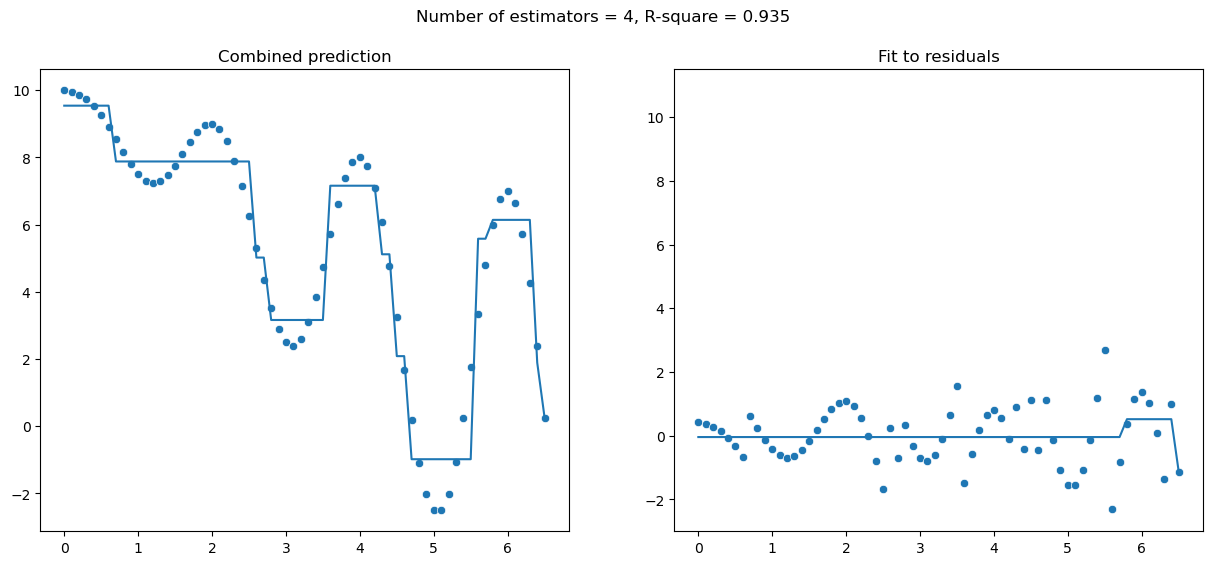

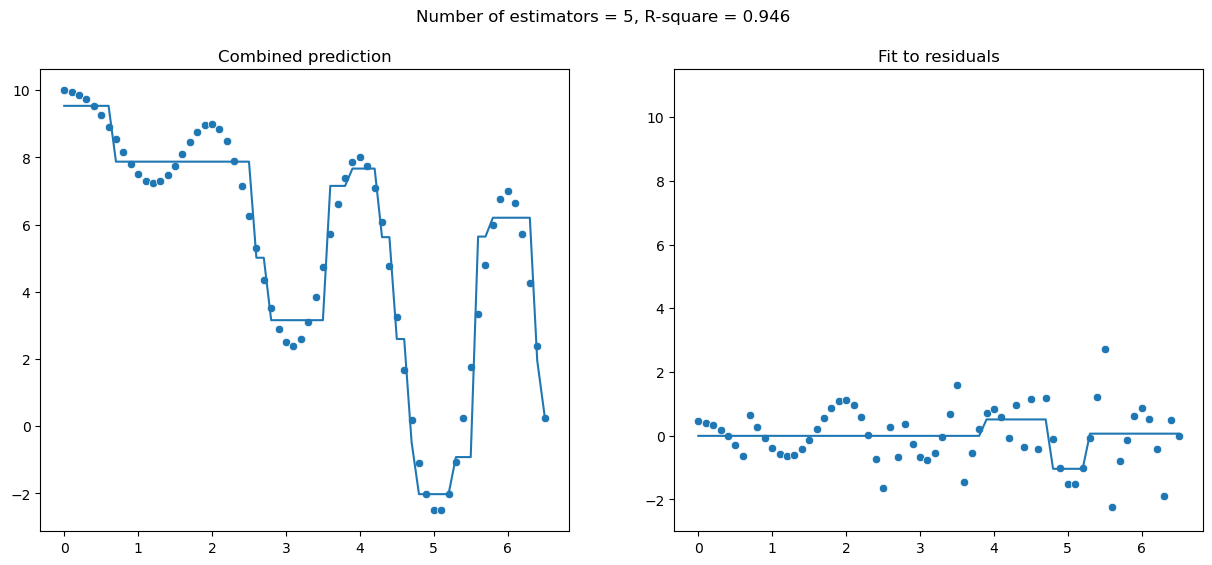

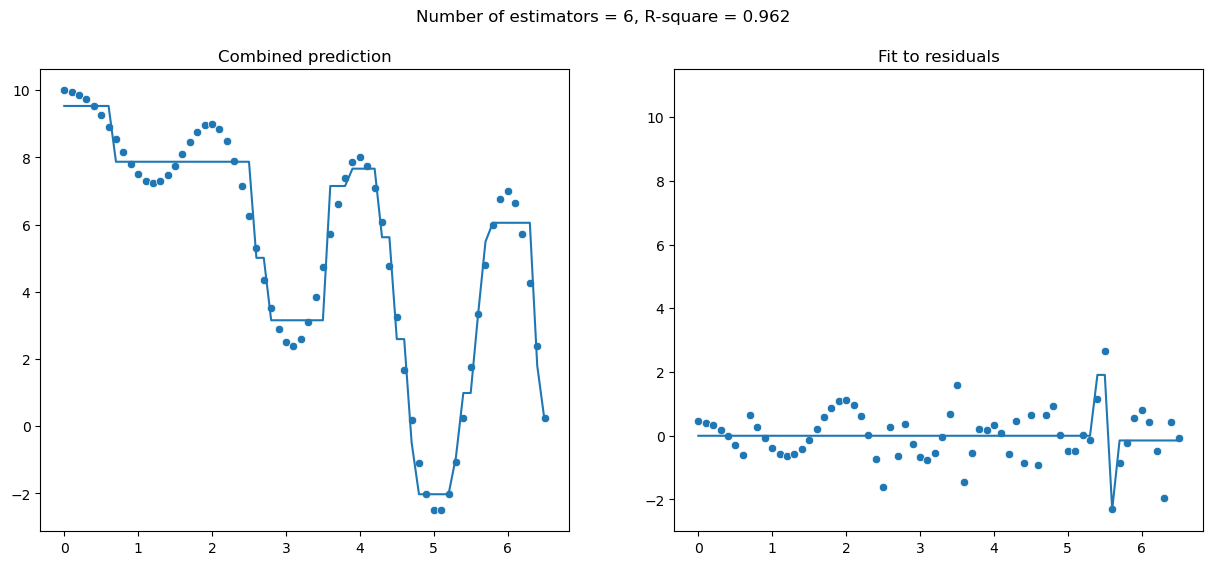

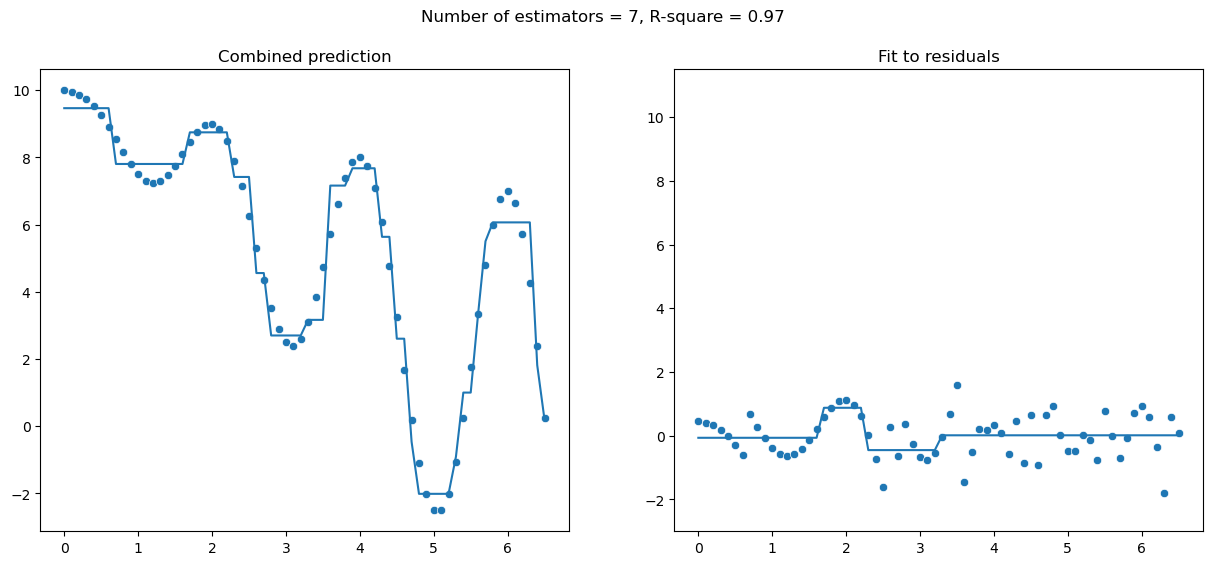

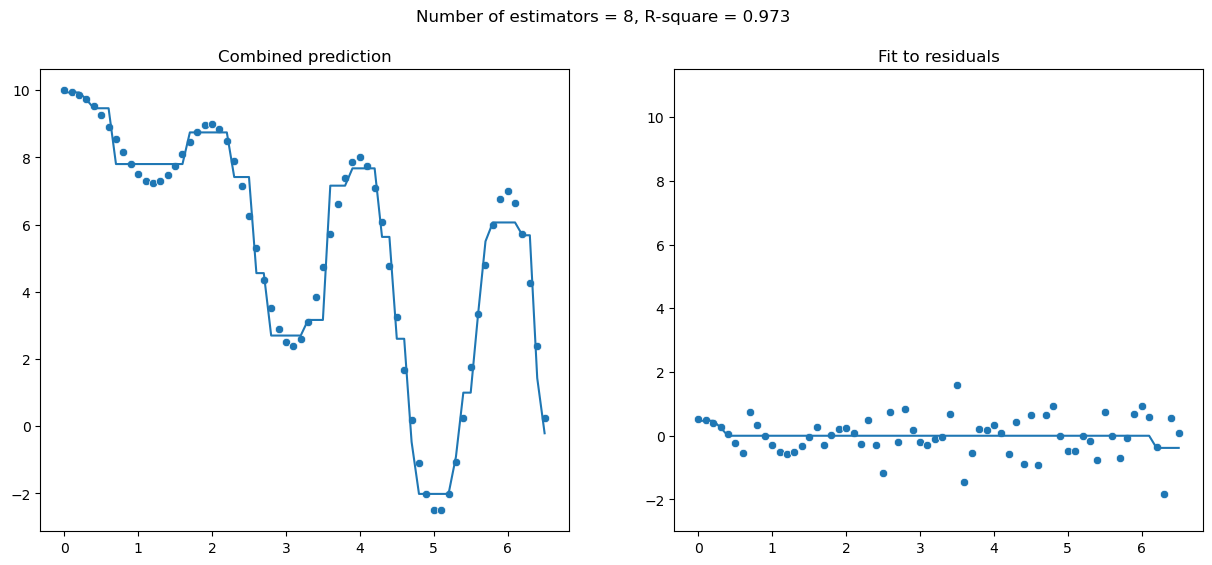

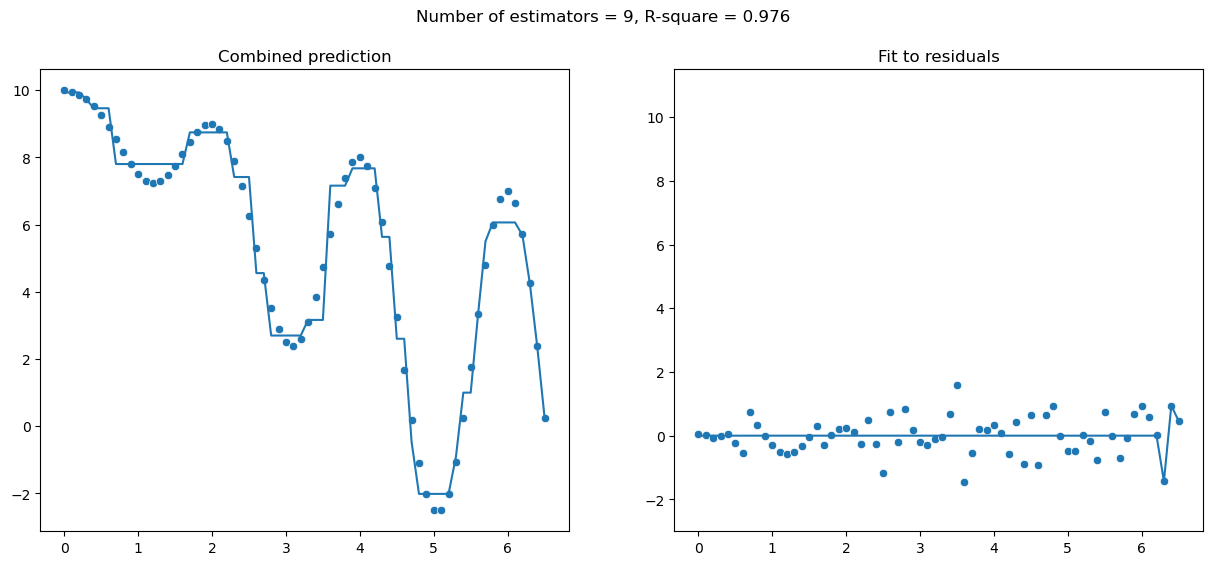

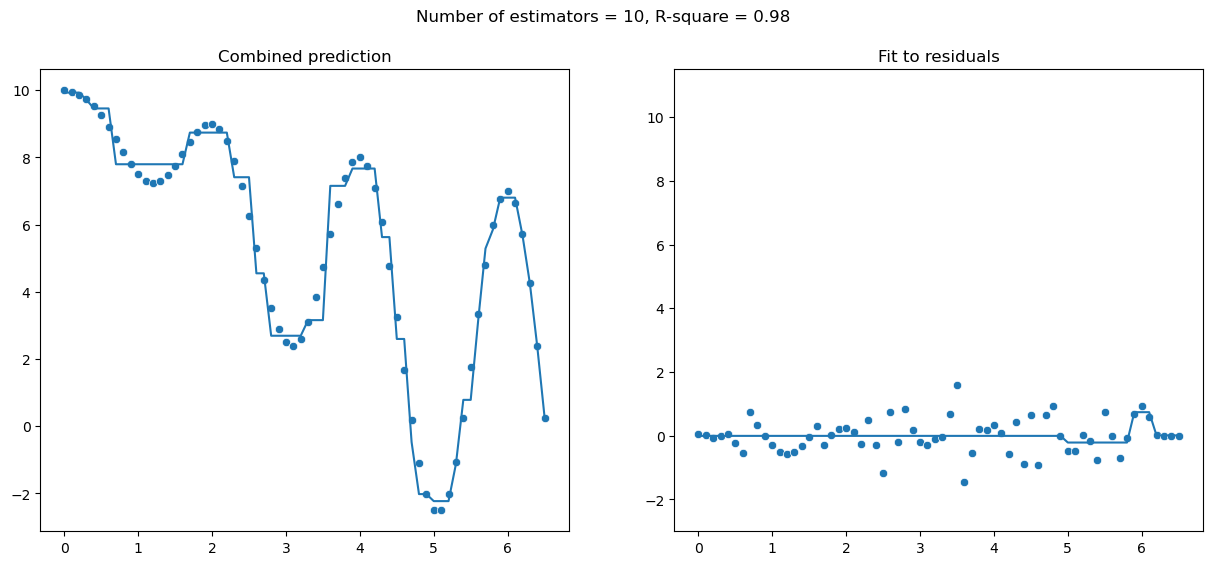

In [6]:
# iteratively boost trees using gradients (residuals) from previous tree
for i in range(n_estimators):

    # initialize a simple decision tree
    clf = DecisionTreeRegressor(max_depth=2, random_state=1234)

    # calculate negative gradient of the loss function (aka residuals)
    Y_train = Y - combined_preds

    # train classifier
    clf.fit(X_train, Y_train)

    # predict target
    preds = clf.predict(X_train)

    # combine predictions
    combined_preds = combined_preds + rate * preds

    # plot combined predictions and fit to residuals
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    tl = (
        "Number of estimators = "
        + str(i + 1)
        + ", R-square = "
        + str(round(pow(np.corrcoef(Y, combined_preds)[0, 1], 2), 3))
    )

    f.suptitle(tl)
    ax1.set_title("Combined prediction")
    sns.scatterplot(x=X, y=Y, ax=ax1)
    sns.lineplot(x=X, y=combined_preds, ax=ax1)
    ax2.set_title("Fit to residuals")
    sns.scatterplot(x=X, y=Y_train, ax=ax2)
    sns.lineplot(x=X, y=preds, ax=ax2)
    ax2.set_ylim(
        min(Y.min(), Y_train.min()) - 0.5, 1.1 * max(Y.max(), Y_train.max()) + 0.5
    )

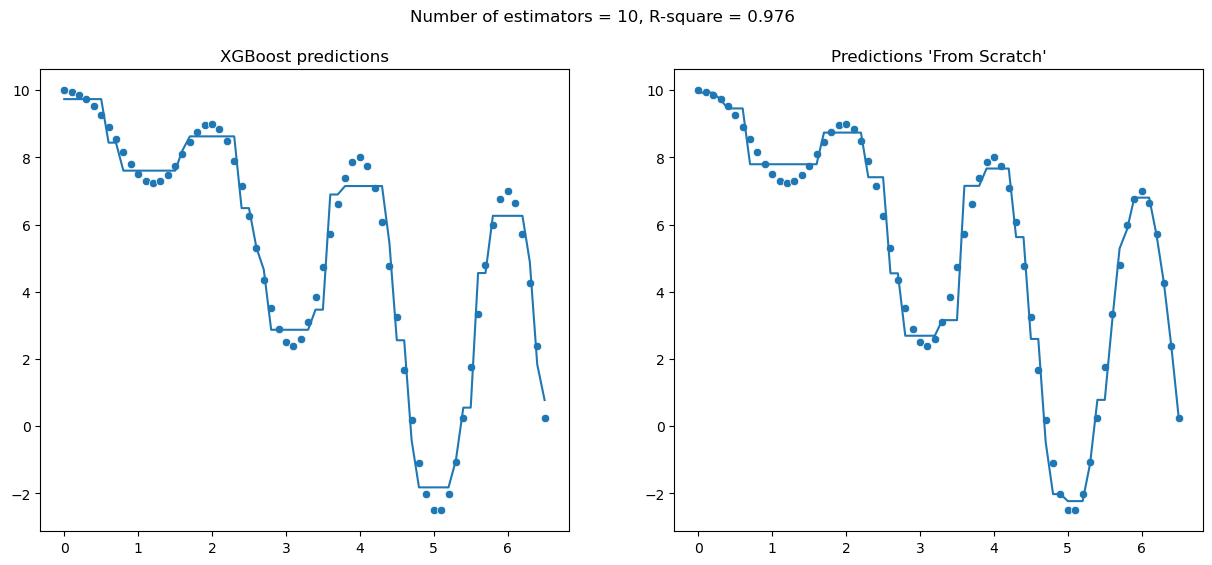

In [7]:
# XGBoost check with (mostly) similar specs (check defaults)

clf = xgb.XGBRegressor(
    n_estimators=n_estimators, max_depth=2, learning_rate=1, random_state=1234
)
clf.fit(X_train, Y)
xpreds = clf.predict(X_train)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
tl = (
    "Number of estimators = "
    + str(i + 1)
    + ", R-square = "
    + str(round(pow(np.corrcoef(Y, xpreds)[0, 1], 2), 3))
)

f.suptitle(tl)
ax1.set_title("XGBoost predictions")
sns.scatterplot(x=X, y=Y, ax=ax1)
sns.lineplot(x=X, y=xpreds, ax=ax1)
ax2.set_title("Predictions 'From Scratch'")
sns.scatterplot(x=X, y=Y, ax=ax2)
fig = sns.lineplot(x=X, y=combined_preds, ax=ax2)